In [ ]:
from scipy.special import gammaln, psi, beta
import numpy as np
import matplotlib.pyplot as plt

# Helper functions in utils

In [ ]:
from utils import *

## expect_log_sticks
- $\tau_1 = (1,2,1)$
- $\tau_2 = (3,5,0)$
- $V_1 = \text{Beta}(1,3)$, $E[\log V_1] = \Psi(1) - \Psi(4)$, $E[\log (1-V_1)] = \Psi(3) - \Psi(4)$.
- $V_2 = \text{Beta}(2,5)$, $E[\log V_2] = \Psi(2) - \Psi(7)$, $E[\log (1-V_2)] = \Psi(5) - \Psi(7)$.
So $E[\log p_1] = \Psi(1) - \Psi(4)$, $E[\log p_2] =  \Psi(2) - \Psi(7) + \Psi(3) - \Psi(4)$, $E[\log p_3] = \Psi(3) - \Psi(4) +  \Psi(5) - \Psi(7)$. 

In [ ]:
tau1 = [1,2,1]
tau2 = [3,5,0]
Elogp = expect_log_sticks(tau1,tau2)
print("Expect Elogp1 %f, got %f" %(psi(1)-psi(4),Elogp[0]))
print("Expect Elogp2 %f, got %f" %(psi(2)-psi(7)+psi(3)-psi(4),Elogp[1]))
print("Expect Elogp3 %f, got %f" %(psi(3)-psi(4)+psi(5)-psi(7),Elogp[2]))

## GEM_expectation
- $\tau_1 = (1,2,1)$
- $\tau_2 = (3,5,0)$
- $V_1 = \text{Beta}(1,3)$, $E[V_1] = 1/4$, $E[1-V_1] = 3/4$.
- $V_2 = \text{Beta}(2,5)$, $E[V_2] = 2/7$, $E[1-V_2] = 5/7$.

So $E[\theta_1] = 1/4$, $E[\theta_2] = 3/4*2/7$, $E[\theta_3] = (3/4)*(5/7)$.

In [ ]:
tau1 = np.array([[1,2,1]])
tau2 = np.array([[3,5,0]])
theta = GEM_expectation(tau1,tau2)
print("Expect Etheta1 %f, got %f" %(1/4,theta[0,0]))
print("Expect Etheta2 %f, got %f" %(3/4*2/7,theta[0,1]))
print("Expect Etheta3 %f, got %f" %(3/4*5/7,theta[0,2]))

## beta_KL

In [ ]:
div1 = beta_KL(1,1,3,3)
print(div1)
print()
div2 = beta_KL(3,3,1,1)
print(div2)
print()

In [ ]:
div3 = beta_KL(3,0.5,0.5,3)
print(div3)
print()
div4 = beta_KL(0.5,3,3,0.5)
print(div4)
print()

In [ ]:
divs = beta_KL(np.array([1,3]),np.array([1,3]),1,1)
print(divs)
print(divs.shape)

## dirichlet_KL

In [ ]:
lambdap = np.array([[3,2,3,1]])
lambdaq = np.array([[3,2,3,1]])
ans1 = dirichlet_KL(lambdap, lambdaq)
print(ans1)

# Common _TopicModel functions

## Convert pre-trained topics of another model into one's initial topics and proportions 
T_dSB_DP and N_dSB_DP's topics after a lot of training look degenerate: most of the underlying proportions is focused on one topic. 

Chong Wang's HDP code might have introduced noise early on in training to avoid this degeneracy.

In [ ]:
from wikipedia import debug

### Evaluate T_dSB_DP topics using LDA predictive distribution
T_dSB_DP topics not good

In [ ]:
method = "lda" 
topicinfo = ["T_dSB_DP", "results/thdpK100_T10_D20_wiki10k_wiki1k/","400"]
debug(method, topicinfo)

### Evaluate N_dSB_DP topics using LDA predictive distribution
N_dSB_DP topics not good

In [ ]:
method = "lda" 
topicinfo = ["N_dSB_DP", "results/nhdpK100_T10_D20_wiki10k_wiki1k/","400"]
debug(method, topicinfo)

### Evaluate LDA topics using T_dSB_DP's predictive distribution
LDA topics after 100 mini-batches better than T_dSB_DP at convergence. The implied topic proportions are reasonable (around 10 topics with significant proportions, degrading gradually).

In [ ]:
method = "thdp" 
topicinfo = ["LDA", "results/ldaK100_D50_wiki10k_wiki1k/","100"]
debug(method, topicinfo)

### Evaluate N_dSB_DP topics using T_dSB_DP's predictive distribution.
N_dSB_DP topics are comparable to T_dSB_DP topics in terms of held-out log-likelihood. The distribution of topic proportions is super skewed: the most common topic has expected proportions almost .8 while the next one has only .05

In [ ]:
method = "thdp" 
topicinfo = ["N_dSB_DP", "results/nhdpK100_T10_D20_wiki10k_wiki1k/","400"]
debug(method, topicinfo)

### Evaluate's LDA topics using N_dSB_DP's predictive distribution
LDA topics after 100 mini-batches better than N_dSB_DP at convergence. The implied topic proportions is roughly uniform across topics.

In [ ]:
method = "nhdp" 
topicinfo = ["LDA", "results/ldaK100_D50_wiki10k_wiki1k/","100"]
debug(method, topicinfo)

### Evaluate T_dSB_DP topics using N_dSB_DP's predictive distribution.
T_dSB_DP topics are comparable to N_dSB_DP topics in terms of held-out log-likelihood. The distribution of topic proportions is super skewed: the most common topic has expected proportions almost .8 while the next one has only .1

In [ ]:
method = "nhdp" 
topicinfo = ["T_dSB_DP", "results/thdpK100_T10_D20_wiki10k_wiki1k/","400"]
debug(method, topicinfo)

## E-step
For the sampled documents, the ELBO is monotonically increasing with coordinate ascent, which is good.

In [1]:
from topicmodelvb import sanity_E_step

### Initialized from scratch

Time to initialize 100-topic model, each document using 10 topics, is 0.07
Document:
             january  	---	  9 
          production  	---	  1 
                four  	---	  2 
         regulations  	---	  1 
             kingdom  	---	  2 
               based  	---	  3 
              stated  	---	  1 
               black  	---	  8 
                test  	---	  1 
             station  	---	  1 
                june  	---	  5 
                 get  	---	  1 
               total  	---	  1 
              opened  	---	  1 
               space  	---	  3 
            sections  	---	  1 
             mission  	---	  2 
               seven  	---	  1 
             landing  	---	  1 
            intended  	---	  2 




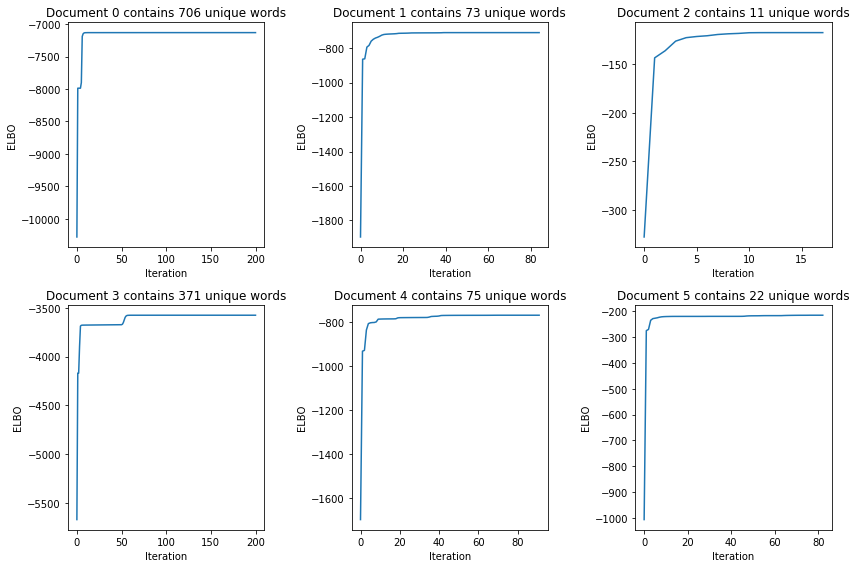

In [4]:
seed = 2
K = 100
T = 10
topicfile = None
sanity_E_step(seed,K,T,topicfile)